In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from material_properties import *

s_range = np.linspace(-1e3,1e3,10)
v_range = np.linspace(0.8/2.7e3,1.2/2.7e3,20)
mg_s, mg_v = np.meshgrid(s_range, v_range)

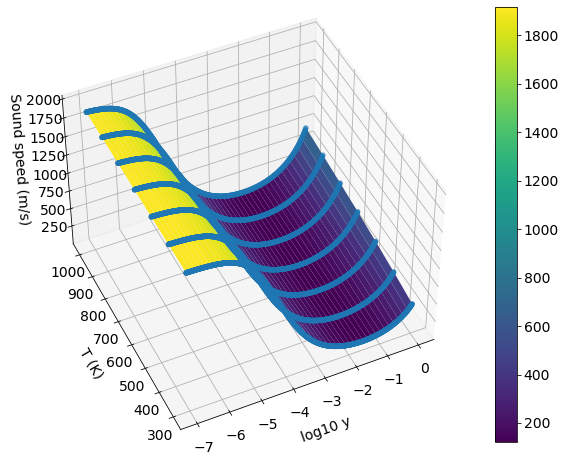

In [44]:
mixture = MixtureMeltCrystalWaterAir()
yA = 1e-7
yWv = 0.03
yM = 1.0 - yA - yWv

plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.view_init(elev=45, azim=-90-25)
# yWv_range = np.linspace(0.0,1,1000)
yWv_range = np.logspace(-7,0,1000)
T_range = np.linspace(300, 1000, 7)
mg_y, mg_T = np.meshgrid(yWv_range, T_range)

p = 1e7
c = np.zeros_like(mg_y)
c_wood = np.zeros_like(mg_y)
for j, y in enumerate(yWv_range):
  for i, T in enumerate(T_range):
    c[i,j] = mixture.sound_speed(p, T, yA, y, 1.0 - yA - y)
    vf = mixture.volfrac(p, T, yA, y, 1.0 - yA - y)
    compressibilities = np.array([1/mixture.air.gamma/p,
      1/mixture.waterEx.gamma/p,
      mixture.magma.v_pT(p, T)*mixture.magma.rho0/mixture.magma.K])
    c_wood[i,j] = np.sqrt(mixture.v_mix(p, T, yA, y, 1.0 - yA - y) /  np.dot(vf, compressibilities))

y_like = mg_y
y_like = np.log10(mg_y)
surf = ax.plot_surface(y_like, mg_T, c, cmap='viridis', edgecolor='none')
ax.scatter(y_like, mg_T, c)
# ax.set_title('Vent pressure')
ax.set_xlabel("log10 y", labelpad=10)
ax.set_ylabel("T (K)", labelpad=10)
ax.set_zlabel("Sound speed (m/s)", labelpad=10)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label,ax.zaxis.label,
              *ax.get_xticklabels(), *ax.get_yticklabels(), *ax.get_zticklabels()]):
  item.set_fontsize(14)
cb = plt.gcf().colorbar(surf)
# cb.set_label("Vent pressure (Pa)", fontsize=14)
cb.ax.tick_params(labelsize=14)

# ax.legend(["1", "2"])
plt.show()